# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

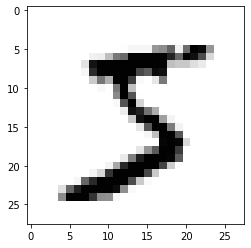

In [4]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [5]:
y_train.shape

(60000,)

In [6]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

2022-02-01 22:05:14.791484: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-01 22:05:14.792148: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


#### My Own Model 

In [38]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
from tensorflow.keras.layers import (Dense, Flatten)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[784, ],name="Flatten"))
model.add(Dense(300,activation="relu",name="Hidden1"))
model.add(Dense(200,activation="relu",name="Hidden2"))
model.add(Dense(100,activation="relu",name="Hidden3"))
model.add(Dense(10,activation="softmax",name="Output"))

In [39]:
opt=keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = opt,
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 200)               60200     
_________________________________________________________________
Hidden3 (Dense)              (None, 100)               20100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [41]:
model.fit(x_train, y_train, epochs=100, batch_size=5000, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.9757 - accuracy: 0.6899 - val_loss: 0.4094 - val_accuracy: 0.8787
Epoch 2/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3067 - accuracy: 0.9091 - val_loss: 0.2298 - val_accuracy: 0.9302
Epoch 3/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1919 - accuracy: 0.9431 - val_loss: 0.1593 - val_accuracy: 0.9507
Epoch 4/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1380 - accuracy: 0.9593 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 5/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1061 - accuracy: 0.9686 - val_loss: 0.1103 - val_accuracy: 0.9665
Epoch 6/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0837 - accuracy: 0.9752 - val_loss: 0.1018 - val_accuracy: 0.9686
Epoch 7/100
60000/60000 [=========================

60000/60000 [==============================] - 1s 17us/sample - loss: 9.3456e-05 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9794
Epoch 55/100
60000/60000 [==============================] - 1s 17us/sample - loss: 8.9767e-05 - accuracy: 1.0000 - val_loss: 0.1167 - val_accuracy: 0.9791
Epoch 56/100
60000/60000 [==============================] - 1s 17us/sample - loss: 8.6709e-05 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9797
Epoch 57/100
60000/60000 [==============================] - 1s 17us/sample - loss: 8.3214e-05 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 0.9793
Epoch 58/100
60000/60000 [==============================] - 1s 17us/sample - loss: 7.9953e-05 - accuracy: 1.0000 - val_loss: 0.1180 - val_accuracy: 0.9791
Epoch 59/100
60000/60000 [==============================] - 1s 17us/sample - loss: 7.7202e-05 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.9795
Epoch 60/100
60000/60000 [==============================] - 1s 18us/sample - loss: 

95%이상의 성능을 가진 모델을 만들면 완성!

In [42]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

10000/1 - 1s - loss: 0.0662 - accuracy: 0.9791

Accuracy: 0.9791
